In [125]:
# for manipulation
import numpy as np
import pandas as pd
# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
# for interactiveness
from ipywidgets import interact


In [126]:
# lets read data
d = pd.read_csv('Desktop/Iris.csv')
d.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [127]:
print("shape of dataset:", d.shape)

shape of dataset: (150, 6)


In [128]:
# checking the missing values in the dataset 
d.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [129]:
# name of dimension present in our dataset
d['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [130]:
# check the summary for all
print("Average SepalLength     :   ",format(d['SepalLengthCm'].mean()))
print("Average SepalWidth      :   ",format(d['SepalWidthCm'].mean()))
print("Average PetalLength     :   ",format(d['PetalLengthCm'].mean()))
print("Average PetalWidth      :   ",format(d['PetalWidthCm'].mean()))

Average SepalLength     :    5.843333333333335
Average SepalWidth      :    3.0540000000000007
Average PetalLength     :    3.7586666666666693
Average PetalWidth      :    1.1986666666666672


In [131]:
# check the summary statistics 
@interact
def summary(dimensions = list(d['Species'].value_counts().index)):
    x = d[d['Species'] == dimensions]
    print(".....................................")
    print("statistics for SepalLength")
    print("minimum SepalLength required  :", x['SepalLengthCm'].min())
    print("Average SepalLength required  :", x['SepalLengthCm'].mean())
    print("maximum SepalLength required  :", x['SepalLengthCm'].max())
    print(".....................................")
    print("statistics for SepalWidth")
    print("minimum SepalWidth required  :", x['SepalWidthCm'].min())
    print("Average SepalWidth required  :", x['SepalWidthCm'].mean())
    print("maximum SepalWidth required  :", x['SepalWidthCm'].max())
    print(".....................................")
    print("statistics for PetalLength ")
    print("minimum PetalLength required  :", x['PetalLengthCm'].min())
    print("Average PetalLength required  :", x['PetalLengthCm'].mean())
    print("maximum PetalLength required  :", x['PetalLengthCm'].max())
    print(".....................................")
    print("statistics for PetalWidth")
    print("minimum PetalWidth required  : {0:.2f}".format(x['PetalWidthCm'].min()))
    print("Average PetalWidth required  : {0:.2f}".format(x['PetalWidthCm'].mean()))
    print("maximum PetalWidth required  : {0:.2f}".format(x['PetalWidthCm'].max()))
    
    
    

interactive(children=(Dropdown(description='dimensions', options=('Iris-setosa', 'Iris-versicolor', 'Iris-virg…

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

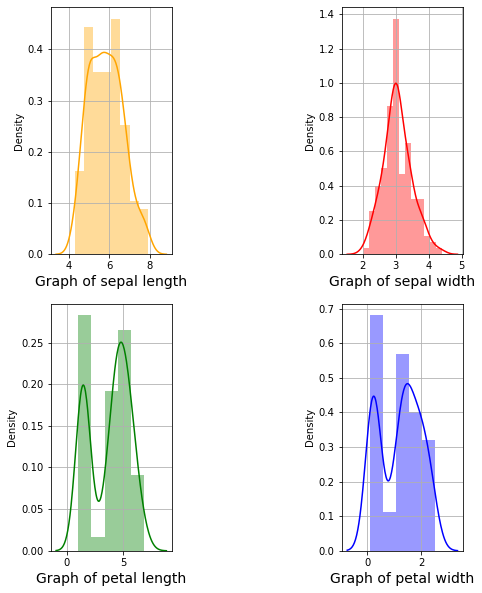

In [132]:
plt.subplot(2,4,1)
sns.distplot(d['SepalLengthCm'], color = 'orange')
plt.xlabel('Graph of sepal length', fontsize = 14)
plt.grid()



plt.subplot(2,4,3)
sns.distplot(d['SepalWidthCm'], color = 'Red')
plt.xlabel('Graph of sepal width', fontsize = 14)
plt.grid()


plt.subplot(2,4,5)
sns.distplot(d['PetalLengthCm'], color = 'Green')
plt.xlabel('Graph of petal length', fontsize = 14)
plt.grid()



plt.subplot(2,4,7)
sns.distplot(d['PetalWidthCm'], color = 'blue')
plt.xlabel('Graph of petal width', fontsize = 14)
plt.grid()

In [133]:
from sklearn.cluster import KMeans
# removing the Species column
x = d.drop(['Species'],axis=1)
# selectiing all the values of the data
x = x.values
# checking the shape
print(x.shape)

(150, 5)


In [134]:
# lets implement the K Means algorithm to perform clustering analysis
a = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = a.fit_predict(x)
# lets find out the results
b = d['Species']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means, b], axis = 1)
z = z.rename(columns = {0: 'cluster'})
# let us check the cluster of each crops
print("lets check the results after applying the K-Means clustering Analysis \n")
print("dimension in first cluster:", z[z['cluster'] == 0]['Species'].unique())
print("dimension in 2nd cluster:", z[z['cluster'] == 1]['Species'].unique())
print("dimension in 3rd cluster:", z[z['cluster'] == 2]['Species'].unique())
print("dimension in fourth cluster:", z[z['cluster'] == 3]['Species'].unique())

lets check the results after applying the K-Means clustering Analysis 

dimension in first cluster: ['Iris-versicolor' 'Iris-virginica']
dimension in 2nd cluster: ['Iris-setosa']
dimension in 3rd cluster: ['Iris-virginica']
dimension in fourth cluster: ['Iris-setosa' 'Iris-versicolor']


In [135]:
# lets split the dataset for predictive modelling
y = d['Species']
x = d.drop(['Species'], axis = 1)
print("shape of x:", x.shape)
print("shape of y:", y.shape)

shape of x: (150, 5)
shape of y: (150,)


In [136]:
# lets create training and testing sets for validation of results
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)
print("the shape of x train:" , x_train.shape)
print("the shape of x test]:" , x_test.shape)
print("the shape of y train:" , y_train.shape)
print("the shape of y test:" , y_test.shape)

the shape of x train: (120, 5)
the shape of x test]: (30, 5)
the shape of y train: (120,)
the shape of y test: (30,)


In [137]:
# lets create a predictive model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


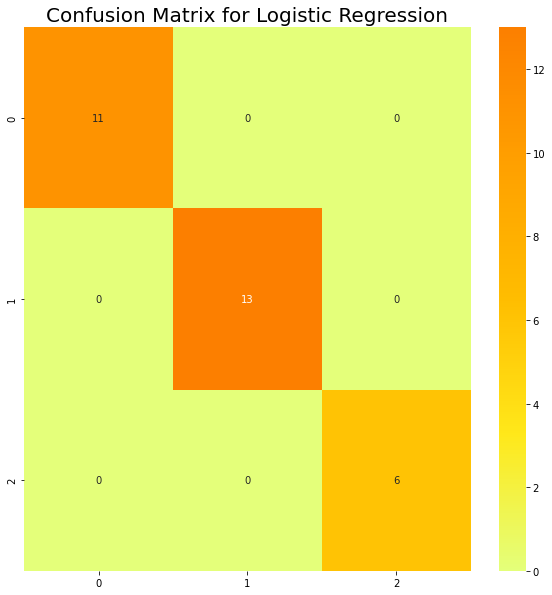

In [138]:
# lets evaluate the model performance
from sklearn.metrics import confusion_matrix
# lets print the confusion matrix first
plt.rcParams['figure.figsize'] = (10,10)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'Wistia')
plt.title('Confusion Matrix for Logistic Regression', fontsize = 20)
plt.show()

In [139]:
# lets print the classification report 
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [140]:
# lets check the head of the dataset
d.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [141]:
prediction = model.predict((np.array([[2,4.9,3.0,1.4,0.2]])))
print("The suggested cluster is :" , prediction)

The suggested cluster is : ['Iris-setosa']


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
